# Coding Logistic Regression From Scratch - Lab

## Introduction

In this lab, you'll practice your ability to translate mathematical algorithms into python functions. This will deepen and solidify your understanding of the logistic regression!

## Objectives

You will be able to:
* Understand and implement logistic regression

## Overview

Recall that the logistic regression algorithm take our previous intuition from logistic regression. In logistic regression, we start by taking our input data, X and multiplying it by a vector of weights for each of the individual features, which produces our output y. Afterwards we'll work on using an iterative approach via gradient descent to tune these weights.

## Linear Regression Setup

Write a simple function `predict_y` that takes in a matrix `X` of observations and a vector of feature weights `w` and outputs a vector of predictions for the various observations.

Recall that this is the sum of the product of each of the feature observations and their corresponding feature weights:  
$ \hat{y}_i = X_{i1} \bullet w_1 + X_{i2} \bullet w_2 + X_{i3} \bullet w_3 + ... + X_{in} \bullet w_n$

Hint: think about which mathematical operation we previously discussed that will take a matrix (X) and multiply it by a vector of weights (w) to succinctly do this in a single operation.

In [1]:
import numpy as np
import doctest

def predict_y(X, w):
    '''Multiply two vectors (same size) element-wise:
    >>> predict_y([1,2,3], [4,5,6])
    array([ 4, 10, 18])
    '''
    return np.mean(np.multiply(X, w), axis=1)

predict_y([[1, 2], [3, 4]], [1, 1])

array([1.5, 3.5])

## The Sigmoid Function

Recall that the sigmoid function is used to map our previous linear regression model to a range of 0 to 1, satisfying basic premises of probability. As a reminder, the sigmoid function is defined by:  
$\frac{1}{1+e^(-x)}$  
Write this as a python function where x is the input and the function outputs the result of the sigmoid function.

In [2]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

## Graphing the Sigmoid

For good measure, let's do a brief investigation of your new function. Graph the output of your sigmoid function using 10,000 X values evenly spaced from -20 to 20.

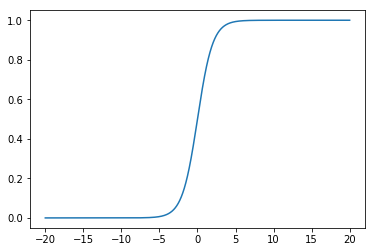

In [11]:
import seaborn as sns

X_s = np.linspace(-20, 20, 10000)
Y_s = [sigmoid(x) for x in X_s]
sns.lineplot(X_s, Y_s);

## Gradient Descent with the Sigmoid Function

Recall that gradient descent is a numerical method for finding a minimum to a cost function. In the case of logistic regression, we are looking to minimize the error between our model's predictions and the actual data labels. To do this, we first calculate an error vector based on the current model's feature weights. We then multiply the transpose of the training matrix itself by this error vector in order to obtain the gradient. Finally, we take the gradient, multiply it by our step size and add this to our current weight vector to update it. Below, write such a function. It will take 5 inputs:  
* X
* y
* max_iterations
* alpha (the step size)
* initial_weights  
By default, have your function set the initial_weights parameter to a vector where all feature weights are set to 1.

In [30]:
# Your code here
def grad_desc(X, y, max_iterations=10000, alpha=1/10000, initial_weights=None):
    """Be sure to set default behavior for the initial_weights parameter."""
    if initial_weights is not None:
        temp_weights = initial_weights
    else:
        temp_weights = np.ones(X.shape[1])
        
    #Create a for loop of iterations
    for i in range(max_iterations):
        
        #Generate predictions using the current feature weights
        y_preds = predict_y(sigmoid(X), temp_weights)
        
        #Calculate an error vector based on these initial predictions and the correct labels
        error_vector = y - y_preds
        
        #Calculate the gradient 
        #As we saw in the previous lab, calculating the gradient is often the most difficult task.
        #Here, your are provided with the closed form solution for the gradient of the log-loss function derived from MLE
        #For more details on the derivation, see the additional resources section below.
        gradient = np.dot(X.transpose(), error_vector) 
        
        #Update the weight vector take a step of alpha in direction of gradient
        temp_weights += gradient * alpha
        
    #Return finalized Weights
    return temp_weights

## Running Your Algorithm

Now that we've coded everything from the ground up, we can further investigate the convergence behavior of our gradient descent algorithm. Remember that gradient descent does not gaurantee a global minimum, only a local minimum, and that small deviations in the starting point or step size can lead to different outputs.  
  
Let's begin by running our algorithm and plotting the successive weights of the features through iterations. Below is a dataset, with X and y predefined for you. Use your logistic regression function to find train a model. As the model trains, record the iteration cycle of the gradient descent algorithm and the weights of the various features. Then, plot this data on subplots for each of the individual features. Each graph should have the iteration number on the x-axis and the value of that feature weight for that iteration cycle on the y-axis. This will visually display how the algorithm is adjusting the weights over successive iterations, and hopefully show convergence on stable weights.

In [35]:
import pandas as pd
import numpy as np

df = pd.read_csv('heart.csv')

X = df[df.columns[:-1]]
y = df.target

weights_over_time = [np.ones(X.shape[1])]
print(weights_over_time)

for n in range(2000):
    recent_weights = grad_desc(X, y, max_iterations=5, initial_weights=weights_over_time[-1])
    weights_over_time.append(recent_weights)
    if n % 200 == 0:
        print(round(recent_weights)
                             
weights_over_time[-1]

[array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])]


TypeError: type numpy.ndarray doesn't define __round__ method

In [34]:
pd.DataFrame(weights_over_time)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.575926,-7.211844,14.708444,-0.050287,1.231463,0.435285,5.35168,10.891106,-11.571547,-5.697492,13.147513,-8.857483,-2.365073
1,-0.575926,-7.211844,14.708444,-0.050287,1.231463,0.435285,5.35168,10.891106,-11.571547,-5.697492,13.147513,-8.857483,-2.365073
2,-0.575926,-7.211844,14.708444,-0.050287,1.231463,0.435285,5.35168,10.891106,-11.571547,-5.697492,13.147513,-8.857483,-2.365073
3,-0.575926,-7.211844,14.708444,-0.050287,1.231463,0.435285,5.35168,10.891106,-11.571547,-5.697492,13.147513,-8.857483,-2.365073
4,-0.575926,-7.211844,14.708444,-0.050287,1.231463,0.435285,5.35168,10.891106,-11.571547,-5.697492,13.147513,-8.857483,-2.365073
5,-0.575926,-7.211844,14.708444,-0.050287,1.231463,0.435285,5.35168,10.891106,-11.571547,-5.697492,13.147513,-8.857483,-2.365073
6,-0.575926,-7.211844,14.708444,-0.050287,1.231463,0.435285,5.35168,10.891106,-11.571547,-5.697492,13.147513,-8.857483,-2.365073
7,-0.575926,-7.211844,14.708444,-0.050287,1.231463,0.435285,5.35168,10.891106,-11.571547,-5.697492,13.147513,-8.857483,-2.365073
8,-0.575926,-7.211844,14.708444,-0.050287,1.231463,0.435285,5.35168,10.891106,-11.571547,-5.697492,13.147513,-8.857483,-2.365073
9,-0.575926,-7.211844,14.708444,-0.050287,1.231463,0.435285,5.35168,10.891106,-11.571547,-5.697492,13.147513,-8.857483,-2.365073


TypeError: unhashable type: 'numpy.ndarray'

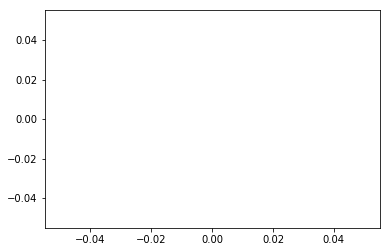

In [27]:
import seaborn as sns

time_x = np.arange(0, 10005, 5)
#sns.lineplot(time_x, weights_over_time)

In [9]:
final_weights = grad_desc(X, y)
final_weights

1.0    165
0.0    138
Name: target, dtype: int64


array([ -0.57592597,  -7.21184424,  14.70844387,  -0.05028691,
         1.23146282,   0.43528515,   5.35167991,  10.89110559,
       -11.57154703,  -5.69749248,  13.14751269,  -8.85748332,
        -2.36507274])

## sci-kit learn

For comparison, import sci-kit learn's standard LogisticRegression function. Initialize a regression object with **no intercept** and with **C=1e16** or another very high number. The reason is as follows: our implementation has not used an intercept, and we have not performed any regularization such as Lasso or Ridge (sci-kit learn uses l2 by default). The high value of C will essentially negate this.

After initializing a regression object, fit it to X and y.

In [10]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(C=)

## Compare the models

Compare the coefficient weights of your model to that generated by sci-kit learn.

In [212]:
# Your code here

## Level - Up

Update the gradient descent algorithm to also return the prediction error after each iteration. Then rerun the algorithm and create a graph displaying the prediction errors versus the iteration number.

In [ ]:
# Your code here

## Additional Resources

If you want to see more of the mathematics behind the gradient derivation above, check out section 4.4.1 from the Elements of Statistical Learning which can be found here: https://web.stanford.edu/~hastie/ElemStatLearn//.

## Summary

Congratulations! You just coded logistic regression from the ground up using NumPy! With this, you should have a fairly deep understanding of logistic regression and how the algorithm works! In the upcoming labs, we'll continue to explore this from a few more angles, plotting our data along with the decision boundary for our predictions.